# Importing The Data & Processing it

**Importing the Required libraries**

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline 
#so that graph remain inline with the notebook

from __future__ import print_function # bring print from python 3 to python 2.6 
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Dropout, Flatten


**Importing The dataset**

In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images,test_labels) = cifar10.load_data()

**Discovering the training data**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
print("Shape of training data : ", train_images.shape, train_labels.shape)
print("Shape of testing data : ", test_images.shape, test_labels.shape)

In [ ]:
#Finding the unique values from the training data 

classes = np.unique(train_labels)
no_of_classes = len(classes)
print("total number of output classes : ", no_of_classes)
print("Output classes : ", classes)

**Finding the shape of input images and creating the variable input_shape**

In [ ]:
no_of_rows, no_of_cols, no_of_dims = train_images.shape[1:]
training_data = train_images.reshape(train_images.shape[0],no_of_rows,no_of_cols,no_of_dims)
testing_data = test_images.reshape(test_images.shape[0],no_of_rows,no_of_cols,no_of_dims)
input_shape = (no_of_rows,no_of_cols,no_of_dims)

**Changing the datatype to Float**

In [ ]:
training_data = training_data.astype('float32')
testing_data = testing_data.astype('float32')


**Scaling the data to lie between 0 and 1**

In [ ]:
training_data /=255 #max value
testing_data /= 255

**Changing the label from integer to categorical data**

In [ ]:
train_Labels = to_categorical(train_labels)
test_Labels = to_categorical(test_labels) # converts the categories to array of 9 0's and one 1 in index of the original value
len(train_Labels[0])

In [ ]:
print("Original label 0 :", train_labels[0])
print("On conversion to categorical (one-hot) : ", train_Labels[0])

# Creating The Model

**Model creation function**

In [ ]:
def createModel():
  model = Sequential()
  #The first two layers with 32 filters of window size 3x3
  model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=input_shape))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(no_of_classes, activation='softmax'))

  return model


In [ ]:
model_one = createModel()
batch_size = 16
epochs = 100
model_one.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=tf.keras.optimizers.RMSprop(lr=2e-5))
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model_one.fit(training_data,train_Labels,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(testing_data,test_Labels))
model_one.evaluate(testing_data,test_Labels)


Epoch 1/100
3125/3125 [==============================] - 57s 18ms/step - loss: 1.2824 - accuracy: 0.5377 - val_loss: 1.2086 - val_accuracy: 0.5653
Epoch 2/100
3125/3125 [==============================] - 55s 18ms/step - loss: 1.2558 - accuracy: 0.5493 - val_loss: 1.1992 - val_accuracy: 0.5690
Epoch 3/100
3125/3125 [==============================] - 54s 17ms/step - loss: 1.2295 - accuracy: 0.5591 - val_loss: 1.1866 - val_accuracy: 0.5760
Epoch 4/100
3125/3125 [==============================] - 55s 17ms/step - loss: 1.2079 - accuracy: 0.5683 - val_loss: 1.1738 - val_accuracy: 0.5773
Epoch 5/100
3125/3125 [==============================] - 54s 17ms/step - loss: 1.1852 - accuracy: 0.5774 - val_loss: 1.2139 - val_accuracy: 0.5640
Epoch 6/100
3125/3125 [==============================] - 54s 17ms/step - loss: 1.1617 - accuracy: 0.5834 - val_loss: 1.1183 - val_accuracy: 0.6006
Epoch 7/100
3125/3125 [==============================] - 54s 17ms/step - loss: 1.1435 - accuracy: 0.5942 - val_loss: 1

[0.7502400279045105, 0.7609999775886536]

In [ ]:
model_one.predict(testing_data)

array([[1.73857588e-05, 7.56301379e-05, 4.79243346e-04, ...,
        1.25969955e-05, 7.77984678e-05, 1.04814708e-05],
       [5.96568100e-02, 2.58863688e-01, 1.92975731e-05, ...,
        3.76150638e-05, 5.19555926e-01, 1.61782995e-01],
       [6.14536926e-02, 2.11522862e-01, 3.01876775e-04, ...,
        1.43593177e-03, 5.01548529e-01, 2.22358271e-01],
       ...,
       [3.30053401e-10, 1.51379465e-10, 1.51586592e-05, ...,
        1.93776199e-04, 2.74495815e-10, 6.47378151e-09],
       [6.75090849e-02, 9.12121415e-01, 1.95229298e-03, ...,
        6.09840848e-04, 1.69285981e-04, 1.13075098e-03],
       [3.95102340e-10, 7.20600593e-11, 3.57437301e-07, ...,
        9.99090791e-01, 4.94809217e-13, 6.23768537e-10]], dtype=float32)

# Plotting The Graphs

**Loss Curves**

Text(0.5, 1.0, 'Loss Curves')

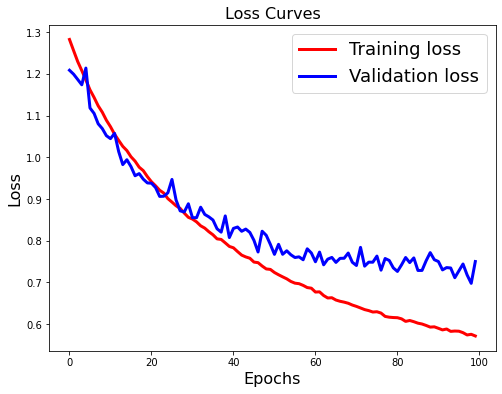

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation loss'], fontsize=18)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

**Accuracy Curves**

Text(0.5, 1.0, 'Accuracy Curves')

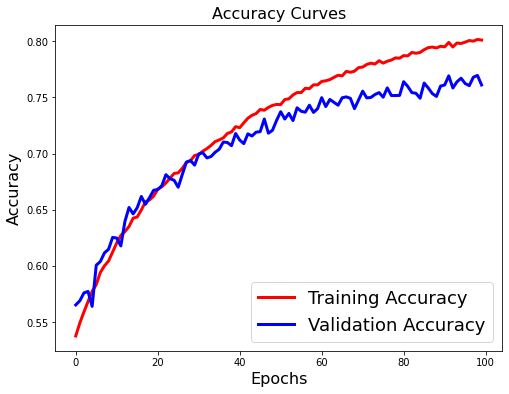

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy','Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)